## Introduction: Business Problem <a name="introduction"></a>


In this project we will use  data science tools to identify which borough in New York City has the most unique places to visit.


## Target audience

people looking to explore unique places to visit New York City

## Background of the problem

people looking to explore unique places in New York City usaully dont know which borough in New York City to visit that the most unique places in New York City

## Data to be used for project <a name="data"></a>

foursquare location data (Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category)


## Libraries used for project

requests(library to handle requests),pandas(library for data analsysis),numpy(library to handle data in a vectorized manner),random(library for random number generation),Nominatim(module to convert an address into latitude and longitude values),Image&HTML(libraries for displaying images),json_normalize(tranforming json file into a pandas dataframe library),folium(plotting library)


In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')


Folium installed
Libraries imported.


In [30]:
CLIENT_ID = 'DCL0PKPZWJHKZECDVMN21AVYC5T04XZJORSEF0Q05JGGYWVM' 
CLIENT_SECRET = 'WCLFWV2JQYTSQZLN2FJDJ5PC2PCSPVGPFV4AGSBIY1MFLV0Q' 
ACCESS_TOKEN = 'BQO2F0JZR1UZBLRQH2NT0CYN5DDK1FWRL5GKLH3QDQHYB255' 
VERSION = '20180604'
radius = 5000
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DCL0PKPZWJHKZECDVMN21AVYC5T04XZJORSEF0Q05JGGYWVM
CLIENT_SECRET:WCLFWV2JQYTSQZLN2FJDJ5PC2PCSPVGPFV4AGSBIY1MFLV0Q


In [109]:
data = {'Borough':  ['Bronx', 'Brooklyn', 'Manhattan', ' Queens', 'Staten Island'],
        'Latitude': ['40.8466508', '40.6501038', '40.7896239', '40.7498243', '40.5834557',],
        'Longitude': ['-73.8785937', '-73.9495823', '-73.9598939', '-73.7976337', '-74.1496048']
       }

df = pd.DataFrame (data, columns = ['Borough','Latitude', 'Longitude'])

df

,Borough,Latitude,Longitude
0,Bronx,40.8466508,-73.8785937
1,Brooklyn,40.6501038,-73.9495823
2,Manhattan,40.7896239,-73.9598939
3,Queens,40.7498243,-73.7976337
4,Staten Island,40.5834557,-74.1496048


In [17]:
df.dtypes

Borough      object
Latitude     object
Longitude    object
dtype: object

In [19]:
df["Latitude"] = pd.to_numeric(df["Latitude"], downcast="float")
df["Longitude"] = pd.to_numeric(df["Longitude"], downcast="float")
df.dtypes

Borough       object
Latitude     float32
Longitude    float32
dtype: object

In [20]:
latitude = 40.8466508
longitude = -73.8785937

map_borough = folium.Map(location=[latitude, longitude], zoom_start=12)
for borough, lat, lng in zip(df['Borough'], df['Latitude'], df['Longitude']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=1,
        parse_html=False).add_to(map_borough)  
    
map_borough

In [49]:
def getNearbyVenues(names, latitudes, longitudes):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        results= requests.get(url).json()["response"]['groups'][0]['items']
        
        #returning only relevant information for each nearby venue and append to the list 
        venues_list.append([(
            name, 
            lat, 
            lng,
            ven['venue']['name'], 
            ven['venue']['location']['lat'], 
           ven['venue']['location']['lng'],  
           ven['venue']['categories'][0]['name']) for ven in results])
        
    return (venues_list)

borough_venues = getNearbyVenues(names = df['Borough'],
                              latitudes = df['Latitude'],
                            longitudes = df['Longitude'])
borough_venues

Bronx
Brooklyn
Manhattan
 Queens
Staten Island


[[('Bronx',
   40.846649169921875,
   -73.87859344482422,
   'Congo Gorilla Forest',
   40.8477740931664,
   -73.88160435479497,
   'Zoo'),
  ('Bronx',
   40.846649169921875,
   -73.87859344482422,
   'JungleWorld',
   40.84522652894162,
   -73.8771813890588,
   'Zoo'),
  ('Bronx',
   40.846649169921875,
   -73.87859344482422,
   'African Lions',
   40.847058199546495,
   -73.8780235243182,
   'Zoo Exhibit'),
  ('Bronx',
   40.846649169921875,
   -73.87859344482422,
   'Grizzly Corner',
   40.849022925582624,
   -73.87773901220096,
   'Zoo Exhibit'),
  ('Bronx',
   40.846649169921875,
   -73.87859344482422,
   'Bronx Zoo',
   40.85310654542512,
   -73.87809446211139,
   'Zoo'),
  ('Bronx',
   40.846649169921875,
   -73.87859344482422,
   'Tiger Mountain',
   40.85126156047489,
   -73.87702008084365,
   'Zoo Exhibit'),
  ('Bronx',
   40.846649169921875,
   -73.87859344482422,
   'Sea Lion Pool',
   40.852882130832036,
   -73.8785453754281,
   'Zoo'),
  ('Bronx',
   40.846649169921875,
 

In [50]:
nearby_venues = pd.DataFrame([item for venue_list in borough_venues for item in venue_list])
nearby_venues.columns = ['Borough',
                    'Borough Latitude',
                     'Borough Longitude',
                     'Venue',
                      'Venue Latitude',
                     'Venue Longitude',
                      'Venue Category']

In [51]:
 nearby_venues

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bronx,40.846649,-73.878593,Congo Gorilla Forest,40.847774,-73.881604,Zoo
1,Bronx,40.846649,-73.878593,JungleWorld,40.845227,-73.877181,Zoo
2,Bronx,40.846649,-73.878593,African Lions,40.847058,-73.878024,Zoo Exhibit
3,Bronx,40.846649,-73.878593,Grizzly Corner,40.849023,-73.877739,Zoo Exhibit
4,Bronx,40.846649,-73.878593,Bronx Zoo,40.853107,-73.878094,Zoo
...,...,...,...,...,...,...,...
495,Staten Island,40.583454,-74.149605,Alfonso's Pastry Shop,40.545037,-74.160852,Bakery
496,Staten Island,40.583454,-74.149605,Dunkin',40.560888,-74.135120,Donut Shop
497,Staten Island,40.583454,-74.149605,P.C. Richard & Son,40.589120,-74.166615,Electronics Store
498,Staten Island,40.583454,-74.149605,Piccolino's italian Restaurant,40.551538,-74.149746,Italian Restaurant


In [64]:
new = nearby_venues[['Borough', 'Venue Category', 'Venue Latitude','Venue Longitude']].copy()

In [67]:
df_new = new.rename(columns={'Venue Category': 'Category','Venue Latitude':'Latitude','Venue Longitude':'Longitude'}, )

In [68]:
df_new

,Borough,Category,Latitude,Longitude
0,Bronx,Zoo,40.847774,-73.881604
1,Bronx,Zoo,40.845227,-73.877181
2,Bronx,Zoo Exhibit,40.847058,-73.878024
3,Bronx,Zoo Exhibit,40.849023,-73.877739
4,Bronx,Zoo,40.853107,-73.878094
...,...,...,...,...
495,Staten Island,Bakery,40.545037,-74.160852
496,Staten Island,Donut Shop,40.560888,-74.135120
497,Staten Island,Electronics Store,40.589120,-74.166615
498,Staten Island,Italian Restaurant,40.551538,-74.149746


In [75]:
df_new['Category'].value_counts()

Pizza Place            34
Park                   26
Italian Restaurant     24
Bakery                 24
Coffee Shop            14
                       ..
Cheese Shop             1
Empanada Restaurant     1
Noodle House            1
Souvenir Shop           1
Beer Garden             1
Name: Category, Length: 155, dtype: int64

In [76]:
print('There are {} Uniques Categories In total between the boroughs .'.format(len(df_new['Category'].unique())))

There are 155 Uniques Categories In total between the boroughs .


In [80]:
df_bronx=df_new[(df_new['Borough'] == 'Bronx')]
df_bronx

,Borough,Category,Latitude,Longitude
0,Bronx,Zoo,40.847774,-73.881604
1,Bronx,Zoo,40.845227,-73.877181
2,Bronx,Zoo Exhibit,40.847058,-73.878024
3,Bronx,Zoo Exhibit,40.849023,-73.877739
4,Bronx,Zoo,40.853107,-73.878094
...,...,...,...,...
95,Bronx,Cuban Restaurant,40.837741,-73.834458
96,Bronx,Food,40.871159,-73.863050
97,Bronx,Vietnamese Restaurant,40.866956,-73.897839
98,Bronx,Italian Restaurant,40.863019,-73.843607


In [87]:
print('There are {} Uniques Categories In total  the bronx .'.format(len(df_bronx['Category'].unique())))

There are 42 Uniques Categories In total  the bronx .


In [83]:
df_staten_island=df_new[(df_new['Borough'] == 'Staten Island')]
df_staten_island

,Borough,Category,Latitude,Longitude
400,Staten Island,Trail,40.586616,-74.146917
401,Staten Island,Grocery Store,40.589997,-74.165715
402,Staten Island,Toy / Game Store,40.581963,-74.166272
403,Staten Island,Gastropub,40.581222,-74.167654
404,Staten Island,Clothing Store,40.580279,-74.166153
...,...,...,...,...
495,Staten Island,Bakery,40.545037,-74.160852
496,Staten Island,Donut Shop,40.560888,-74.135120
497,Staten Island,Electronics Store,40.589120,-74.166615
498,Staten Island,Italian Restaurant,40.551538,-74.149746


In [88]:
print('There are {} Uniques Categories In total in Staten Island  .'.format(len(df_staten_island['Category'].unique())))

There are 53 Uniques Categories In total in Staten Island  .


In [89]:
df_brooklyn=df_new[(df_new['Borough'] == 'Brooklyn')]
df_brooklyn

,Borough,Category,Latitude,Longitude
100,Brooklyn,Caribbean Restaurant,40.649091,-73.949243
101,Brooklyn,Theater,40.646110,-73.957175
102,Brooklyn,Restaurant,40.656012,-73.959912
103,Brooklyn,Caribbean Restaurant,40.654953,-73.959783
104,Brooklyn,Café,40.660007,-73.953362
...,...,...,...,...
195,Brooklyn,American Restaurant,40.681470,-73.955800
196,Brooklyn,Caribbean Restaurant,40.680807,-73.949525
197,Brooklyn,Fish Market,40.677063,-73.969198
198,Brooklyn,Bakery,40.678468,-73.968684


In [90]:
print('There are {} Uniques Categories In total in Brooklyn  .'.format(len(df_brooklyn['Category'].unique())))

There are 61 Uniques Categories In total in Brooklyn  .


In [91]:
df_manhattan=df_new[(df_new['Borough'] == 'Manhattan')]
df_manhattan

,Borough,Category,Latitude,Longitude
200,Manhattan,Field,40.790160,-73.955498
201,Manhattan,Museum,40.785276,-73.957411
202,Manhattan,Reservoir,40.784213,-73.961058
203,Manhattan,Art Museum,40.784333,-73.957765
204,Manhattan,Café,40.787679,-73.953899
...,...,...,...,...
295,Manhattan,Liquor Store,40.767272,-73.959544
296,Manhattan,Concert Hall,40.773359,-73.982373
297,Manhattan,College Arts Building,40.773749,-73.982829
298,Manhattan,French Restaurant,40.766829,-73.967579


In [93]:
print('There are {} Uniques Categories In total in Manhattan  .'.format(len(df_manhattan['Category'].unique())))

There are 59 Uniques Categories In total in Manhattan  .


In [95]:
df_queens=df_new[(df_new['Borough'] == ' Queens')]
df_queens

,Borough,Category,Latitude,Longitude
300,Queens,Pizza Place,40.758193,-73.795719
301,Queens,Park,40.747715,-73.808877
302,Queens,Bagel Shop,40.739460,-73.790554
303,Queens,Movie Theater,40.741098,-73.784097
304,Queens,Athletics & Sports,40.761575,-73.795557
...,...,...,...,...
395,Queens,Pizza Place,40.748445,-73.756498
396,Queens,Tapas Restaurant,40.770271,-73.793495
397,Queens,Park,40.772293,-73.769168
398,Queens,Pizza Place,40.761446,-73.770070


In [97]:
print('There are {} Uniques Categories In total in Queens  .'.format(len(df_queens['Category'].unique())))

There are 55 Uniques Categories In total in Queens  .


In [111]:
unique_bronx=len(df_bronx['Category'].unique())
unique_manhattan=len(df_manhattan['Category'].unique())
unique_brooklyn=len(df_brooklyn['Category'].unique())
unique_staten_island=len(df_queens['Category'].unique())
unique_queens=len(df_queens['Category'].unique())

df_category={ 'Bronx':[unique_bronx],'Manhattan':[unique_manhattan], 'Brooklyn':[unique_brooklyn], 'Staten Island':[unique_staten_island], 'Queens':[unique_queens],  
}
df_category
df_category_list=pd.DataFrame (df_category, columns = ['Bronx','Manhattan','Brooklyn','Staten Island','Queens'])
df_category_list

,Bronx,Manhattan,Brooklyn,Staten Island,Queens
0,42,59,61,55,55


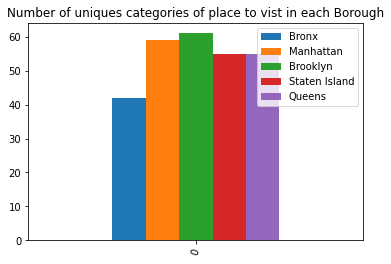

In [114]:
df_category_list.plot.bar( rot=70, title="Number of uniques categories of place to vist in each Borough");


## As we can see Brooklyn has the most unique places Between the rest of the boroughs of New York